# logistic classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## qiita 1

https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

In [1]:
import seaborn as sns
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る

In [2]:
iris_df

sepal_length  sepal_width  petal_length  petal_width     species
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
53            5.5          2.3           4.0          1.3  versicolor
54            6.5          2.8           4.6          1.5  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3   virginica
146           6.3          2.5           5.0          1.9   virginica
147           6.5          3.0           5.2          2.0   virginica
148           6.2          3.4           5.4          2.3   virginica
149           5.9          3.0           5.1          1.8   virginica

[100 rows x 5 columns]

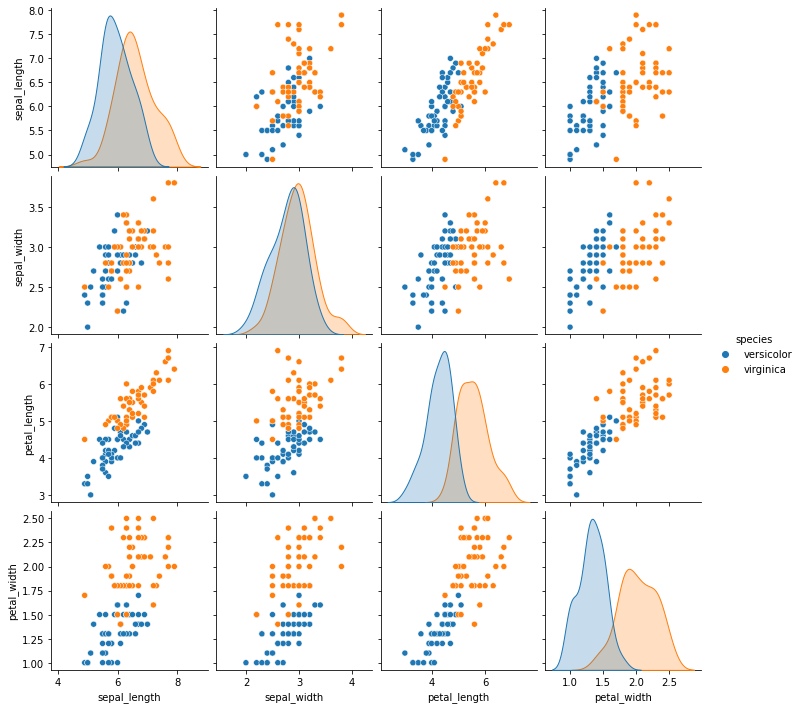

In [3]:
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue='species')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']] # 説明変数
Y = iris_df['species'].map({'versicolor': 0, 'virginica': 1}) # versicolorをクラス0, virginicaをクラス1とする
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression()

In [8]:
print("coefficient = ", lr.coef_)  # w_0
print("intercept = ", lr.intercept_)  # w_1

coefficient =  [[3.43226939]]
intercept =  [-16.54483764]


In [16]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

confusion matrix = 
 [[ 7  3]
 [ 0 10]]
accuracy =  0.85
precision =  0.7692307692307693
recall =  1.0
f1 score =  0.8695652173913044


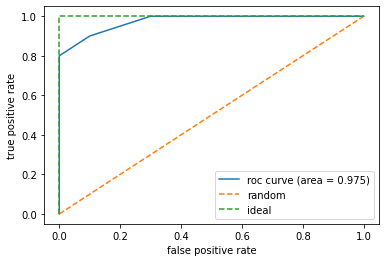

In [14]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))


auc =  0.975


## qiita 2

https://qiita.com/Hawaii/items/ee2a0687ca451fe213be

- ロジスティック回帰であればScikit-learnでは「LogisticRegression」でもモデル構築可能です。
- SGDClassifierとは確率的勾配降下法でモデルを構築したい場合に使用します

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

#2020年9月13日追加
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = pd.DataFrame({
        "bunri":[False,True,False,True,True,False,True,False,True,False,False,True,False,False,False],
        "Japanese_score":[45, 60, 52, 70, 85, 31, 90, 55, 75, 30, 42, 65, 38, 55, 60],
        "Math_score":[75, 50, 80, 35, 40, 65, 42, 90, 35, 90, 80, 35, 88, 80, 90],
    })

In [21]:
y = data["bunri"].values
x1, x2 = data["Japanese_score"].values, data["Math_score"].values 
# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(x1[y], x2[y], 'o', color='C0', label='bunkei')#青い点：yがTrue(=文系）のもの
plt.plot(x1[~y], x2[~y], '^', color='C1', label='rikei')#オレンジの点：yがFalse(=理系）のもの
plt.xlabel("Japanese_score")
plt.ylabel("Math_score")
plt.legend(loc='best')
plt.show()

In [25]:
print(data)
y = data["bunri"].values#先ほどの図示と同じなので割愛してもOK
X = data[["Japanese_score", "Math_score"]].values

    bunri  Japanese_score  Math_score
0   False              45          75
1    True              60          50
2   False              52          80
3    True              70          35
4    True              85          40
5   False              31          65
6    True              90          42
7   False              55          90
8    True              75          35
9   False              30          90
10  False              42          80
11   True              65          35
12  False              38          88
13  False              55          80
14  False              60          90


In [42]:
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000,
                    fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

SGDClassifier(loss='log', max_iter=10000, penalty='none', random_state=1234)

- loss：損失関数を何に設定するか。logにすることで、ロジスティック回帰と同義になります。デフォルトはhinge（ヒンジ損失関数）で、SVMに使用されます。
- penalty：罰則をどのように設けるか。デフォルトはl2（L2正則化）。
- max_iter：最大のエポック数を設定する。エポック数とは、「一つの訓練データを何回繰り返して学習させるか」の数のこと。
- fit_intercept：Falseにすると切片が0に設定される。デフォルトはTrue。
- random_state：データを分割したりする際の乱数のシード値。これを同じ数値にすることで、毎回同じ結果が得られるようにする。
- tol：どれくらいで処理を停止させるかの基準のこと。ここはあまりきちんと説明されたサイトや書籍を見つけられていないのですが、おそらく膨大なデータを扱う際の処理時間に影響すると思われます。

In [43]:
# 重みを取得して表示
#2020年9月13日修正（Beforeではw0：b、w1：a1、w2：a2と記載しておりました）
print(clf.intercept_)
print(clf.coef_)
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]

[4.93080091]
[[ 901.68461898 -966.50749986]]


今回の例では説明変数は国語の点数と数学の点数の2つなので、
$
y
=
\frac{1}{1+\exp(w0+w1x1+w2x2)}
$

In [30]:
y = data["bunri"].values
x1, x2 = data["Japanese_score"].values, data["Math_score"].values 
# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(x1[y], x2[y], 'o', color='C0', label='bunkei')#青い点：yがTrue(=文系）のもの
plt.plot(x1[~y], x2[~y], '^', color='C1', label='rikei')#オレンジの点：yがFalse(=理系）のもの
plt.xlabel("Japanese_score")
plt.ylabel("Math_score")
plt.legend(loc='best')

# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='kyoukai')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')
plt.show()

In [39]:
x1

array([45, 60, 52, 70, 85, 31, 90, 55, 75, 30, 42, 65, 38, 55, 60])